# Laboration 3 – VG-rapport

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataframe = pd.read_csv("unlabelled_data.csv", header=None, names=["x","y"])


## Metod

I den här rapporten går jag igenom hur jag delar in punkterna i `unlabelled_data.csv` i två olika klasser med hjälp av en rak linje på formen **y = kx + m**. Först väljer jag en egen linje som delar punkterna så bra som möjligt. Därefter jämför jag min linje med tre andra linjer som finns angivna i uppgiften för att se om de ger ett annat resultat.

Den linje jag använde som utgångspunkt är:

- **y = −1·x + 0**

De tre linjer jag jämför med är:

- **f(x) = −0.489·x**
- **g(x) = −2·x + 0.16**
- **h(x) = 800·x − 120**


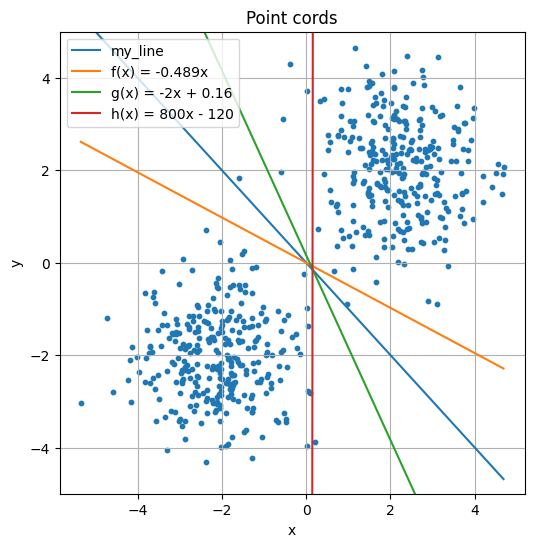

In [32]:
# my line and the 3 given lines
lines = {
    "my_line": {"k": -1.0, "m": 0.0},
    "f(x) = -0.489x": {"k": -0.489, "m": 0.0},
    "g(x) = -2x + 0.16": {"k": -2.0, "m": 0.16},
    "h(x) = 800x - 120": {"k": 800.0, "m": -120.0},
}

# x intervals for line printing
x_vals = np.linspace(dataframe["x"].min(), dataframe["x"].max(), 200)

plt.figure(figsize=(6,6))
plt.scatter(dataframe["x"], dataframe["y"], s=10)  

# plotting all lines
for name, params in lines.items():
    k = params["k"]
    m = params["m"]
    y_vals = k * x_vals + m
    plt.plot(x_vals, y_vals, label=name)

plt.title("Point cords")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.ylim(-5, 5)
plt.grid(True)
plt.show()


In [33]:
# labels 0 or 1 for each line 
labels = {}

for name, params in lines.items():
    k = params["k"]
    m = params["m"]

    # 1 if the point is above/on the line, otherwise 0
    lab = (dataframe["y"].values >= k * dataframe["x"].values + m).astype(int)

    labels[name] = lab


# Sum 0s and 1s for each line
summary = []

for name, lab in labels.items():
    summary.append({
        "line": name,
        "below": int((lab == 0).sum()),  
        "above": int((lab == 1).sum())   
    })

pd.DataFrame(summary).set_index("line")


,below,above
line,,
my_line,298,302
f(x) = -0.489x,299,301
g(x) = -2x + 0.16,299,301
h(x) = 800x - 120,298,302


In [34]:
base = labels["my_line"]   # this is the reference line we compare against

diff = []
for name, lab in labels.items():
    differences = (lab != base).sum()   # count how many labels differ
    diff.append({
        "line": name,
        "number of differences vs my line": differences
    })

pd.DataFrame(diff)


,line,number of differences vs my line
0,my_line,0
1,f(x) = -0.489x,1
2,g(x) = -2x + 0.16,1
3,h(x) = 800x - 120,594


## Diskussion (punkt iii)

När jag jämförde linjerna såg jag att de gav olika resultat.  
Framför allt skiljde sig linjen **h(x) = 800x − 120** mycket från min egen linje, vilket syns i tabellen över skillnader. Det beror på att den delar klustret på mitten genom lodrÄtt nÄstan igenom origo.

Linjerna **f(x)** och **g(x)** gav klassificeringar som låg närmare min linje. Det antagantet man kan göra av detta Är att det finns flera olika linjer som hade passat vÄldigt bra som fördelare!

### Finns det en anledning att föredra någon linje?

En linje med en rimlig lutning är att föredra så alla utom linjen h(x), men f(g) och f(x) delar in datan bÄttre
För att lutningen är jättestor k= 800.
När lutningen är så brant räcker det med att punkten flyttar sig lite i x-led, så hoppar den till andra sidan av linjen. Då kan klassificeringen ändras fast datan nästan inte ändrats alls.

### Hur många sådana linjer kan vi hitta?

Det finns i princip hur många linjer som helst som kan dela punkterna. Men bara för att en linje delar dem betyder det inte att den är bra — vissa linjer ger ett resultat som ändras mycket om datan ändras lite, medan andra ger ungefär samma resultat även om man stör datan lite.

